In [1]:
#imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as st
import quandl
from quandl_apitoken import api_key

In [2]:
try:
    copper_download = quandl.get("CHRIS/CME_HG2", authtoken=api_key)
    gold_download = quandl.get("CHRIS/CME_GC2", authtoken=api_key)
    SP500_download = quandl.get("CHRIS/CME_ES2", authtoken=api_key)
    
    copper_download.to_csv("copper_2nd.csv")
    gold_download.to_csv("gold_2nd.csv")
    SP500_download.to_csv("SP500_2nd.csv")
    

except Exception as e:
    print(e)

In [3]:
csv_file = os.path.join("copper_2nd.csv")
copper_raw_df = pd.read_csv(csv_file)
copper_raw_df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1959-10-29,0.3240,0.3240,0.3190,0.3240,NaN,0.3240,79.0,582.0
1,1959-10-30,0.3215,0.3278,0.3210,0.3215,NaN,0.3215,100.0,592.0
2,1959-11-02,0.3230,0.3230,0.3180,0.3230,NaN,0.3230,88.0,587.0
3,1959-11-04,0.3300,0.3307,0.3259,0.3300,NaN,0.3300,135.0,577.0
4,1959-11-05,0.3310,0.3340,0.3310,0.3310,NaN,0.3310,161.0,617.0


In [4]:
SP500 = 'SP500_2nd.csv'
SP500_df= pd.read_csv(SP500)
SP500_df.tail()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5785,2020-06-03,3067.00,3118.00,3063.0,3106.25,41.00,3106.50,23328.0,54240.0
5786,2020-06-04,3106.75,3115.75,3077.0,3103.00,6.75,3099.75,31864.0,57382.0
5787,2020-06-05,3102.25,3199.75,3096.0,3175.00,76.75,3176.50,56532.0,66325.0
5788,2020-06-08,3181.50,3220.50,3173.0,3215.50,40.25,3216.75,89946.0,75367.0
5789,2020-06-09,3216.00,3220.00,3179.0,3194.50,22.25,3194.50,92923.0,127169.0


In [5]:
SP500_df = SP500_df.sort_index(axis=0, ascending=True)
SP500_df.head()


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1997-09-09,943.50,951.00,941.50,944.00,NaN,944.00,896.0,273.0
1,1997-09-10,942.75,943.25,917.00,925.00,NaN,925.00,12261.0,382.0
2,1997-09-11,924.00,929.75,910.25,918.25,NaN,918.25,9759.0,2909.0
3,1997-09-12,918.00,936.50,913.50,933.75,NaN,933.75,18496.0,4059.0
4,1997-09-15,933.50,939.75,929.00,931.50,NaN,931.50,11749.0,3818.0


In [6]:
sp500_percent_return = []
previous_price = 117.45
for index , row in SP500_df.iterrows():
    Settle_row = row["Settle"]
    dailySP500_return = (Settle_row - previous_price) / previous_price *100
    sp500_percent_return.append(round(dailySP500_return, 2))
    previous_price = Settle_row
SP500_df.insert(1,"SP Daily Pct Return", sp500_percent_return)
SP500_df.tail()


,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5785,2020-06-03,1.34,3067.00,3118.00,3063.0,3106.25,41.00,3106.50,23328.0,54240.0
5786,2020-06-04,-0.22,3106.75,3115.75,3077.0,3103.00,6.75,3099.75,31864.0,57382.0
5787,2020-06-05,2.48,3102.25,3199.75,3096.0,3175.00,76.75,3176.50,56532.0,66325.0
5788,2020-06-08,1.27,3181.50,3220.50,3173.0,3215.50,40.25,3216.75,89946.0,75367.0
5789,2020-06-09,-0.69,3216.00,3220.00,3179.0,3194.50,22.25,3194.50,92923.0,127169.0


In [7]:
#SP500["Date"] = pd.to_datetime(SP500_df["Date"])

In [8]:
SP500_df["Date"] = pd.to_datetime(SP500_df["Date"])

In [9]:
SP87_df = SP500_df.loc[(SP500_df["Date"] >= "1987-01-02") & 
                                   (SP500_df["Date"] <= "1987-10-31")]
SP87_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest


In [10]:
SPLTCM_df = SP500_df.loc[(SP500_df["Date"] >= "1997-10-01") & 
                                   (SP500_df["Date"] <= "1998-10-31")]
SPLTCM_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
16,1997-10-01,0.93,975.00,975.50,971.00,973.75,NaN,973.75,13.0,10.0
17,1997-10-02,0.59,970.75,980.00,970.75,979.50,NaN,979.50,20.0,14.0
18,1997-10-03,0.66,996.00,996.00,976.75,986.00,NaN,986.00,6.0,22.0
19,1997-10-06,0.30,989.25,995.00,989.00,989.00,NaN,989.00,21.0,22.0
20,1997-10-07,1.11,993.50,1001.00,991.50,1000.00,NaN,1000.00,1.0,23.0
...,...,...,...,...,...,...,...,...,...,...
288,1998-10-26,0.46,1083.00,1099.50,1083.00,1089.00,NaN,1089.00,45.0,143.0
289,1998-10-27,-0.48,1098.00,1101.75,1078.75,1083.75,NaN,1083.75,59.0,132.0
290,1998-10-28,-0.32,1079.00,1088.00,1075.00,1080.25,NaN,1080.25,17.0,140.0
291,1998-10-29,2.29,1084.00,1105.25,1080.25,1105.00,NaN,1105.00,65.0,173.0


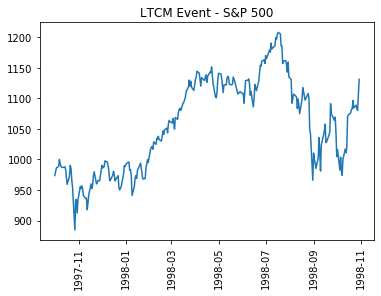

In [11]:
plt.plot(SPLTCM_df['Date'],SPLTCM_df['Settle'])
plt.title("LTCM Event - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [12]:
SPtech_df = SP500_df.loc[(SP500_df["Date"] >= "1999-01-02") & 
                                   (SP500_df["Date"] <= "2000-09-30")]
SPtech_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
336,1999-01-04,-0.74,1261.00,1270.00,1241.75,1241.75,NaN,1241.75,19.0,17.0
337,1999-01-05,1.95,1248.50,1267.50,1248.50,1266.00,NaN,1266.00,9.0,17.0
338,1999-01-06,2.29,1270.00,1297.00,1270.00,1295.00,NaN,1295.00,10.0,16.0
339,1999-01-07,-1.06,1291.25,1291.25,1280.25,1281.25,NaN,1281.25,8.0,17.0
340,1999-01-08,1.15,1300.00,1301.00,1284.75,1296.00,NaN,1296.00,13.0,17.0
...,...,...,...,...,...,...,...,...,...,...
776,2000-09-25,1.43,1490.00,1490.00,1490.00,1490.00,NaN,1490.00,2.0,6.0
777,2000-09-26,-1.71,1464.50,1490.00,1464.50,1464.50,NaN,1464.50,2.0,6.0
778,2000-09-27,0.27,1468.50,1475.50,1462.00,1468.50,NaN,1468.50,0.0,6.0
779,2000-09-28,2.01,1498.00,1500.00,1498.75,1498.00,NaN,1498.00,0.0,6.0


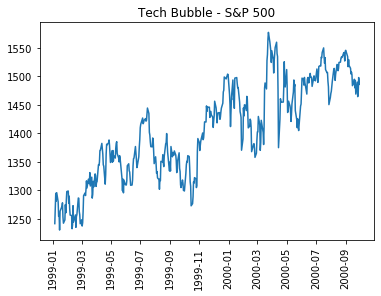

In [13]:
plt.plot(SPtech_df['Date'],SPtech_df['Settle'])
plt.title("Tech Bubble - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [14]:
SP911_df = SP500_df.loc[(SP500_df["Date"] >= "2000-01-02") & 
                                   (SP500_df["Date"] <= "2001-10-31")]
SP911_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
592,2000-01-03,-2.30,1513.00,1513.25,1468.50,1468.50,NaN,1468.50,4.0,13.0
593,2000-01-04,-1.26,1450.00,1450.00,1433.50,1450.00,NaN,1450.00,1.0,14.0
594,2000-01-05,-2.62,1465.00,1435.00,1412.00,1412.00,NaN,1412.00,6.0,15.0
595,2000-01-06,1.97,1419.25,1440.00,1418.00,1439.75,NaN,1439.75,24.0,20.0
596,2000-01-07,1.61,1447.00,1463.00,1446.75,1463.00,NaN,1463.00,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...
1049,2001-10-25,1.63,1071.00,1106.00,1071.00,1104.75,NaN,1104.75,3.0,19.0
1050,2001-10-26,-0.07,1104.00,1105.50,1104.00,1104.00,NaN,1104.00,2.0,19.0
1051,2001-10-29,-2.67,1091.00,1091.00,1074.50,1074.50,NaN,1074.50,2.0,19.0
1052,2001-10-30,-1.30,1059.00,1060.50,1059.00,1060.50,NaN,1060.50,1.0,20.0


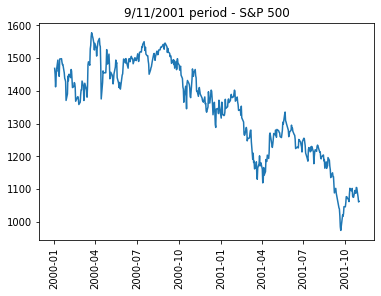

In [15]:
plt.plot(SP911_df['Date'],SP911_df['Settle'])
plt.title("9/11/2001 period - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [16]:
SPFC_df = SP500_df.loc[(SP500_df["Date"] >= "2007-01-02") & 
                                   (SP500_df["Date"] <= "2008-12-31")]
SPFC_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
2363,2007-01-02,0.00,1450.50,1450.50,1441.00,1441.00,NaN,1441.00,51.0,12838.0
2364,2007-01-03,-0.24,1450.25,1452.50,1430.50,1437.50,NaN,1437.50,596.0,13052.0
2365,2007-01-04,0.17,1435.50,1443.50,1430.00,1440.00,NaN,1440.00,333.0,13222.0
2366,2007-01-05,-0.76,1438.50,1438.50,1427.00,1429.00,NaN,1429.00,597.0,13716.0
2367,2007-01-08,0.44,1430.50,1437.00,1425.50,1435.25,NaN,1435.25,594.0,14218.0
...,...,...,...,...,...,...,...,...,...,...
2876,2008-12-24,0.76,859.50,862.50,856.00,862.50,NaN,862.50,19.0,7489.0
2877,2008-12-26,0.46,866.50,866.75,862.50,866.50,NaN,866.50,53.0,7480.0
2878,2008-12-29,0.17,864.75,870.00,851.00,868.00,NaN,868.00,426.0,7266.0
2879,2008-12-30,2.02,870.25,885.75,868.00,885.50,NaN,885.50,471.0,7584.0


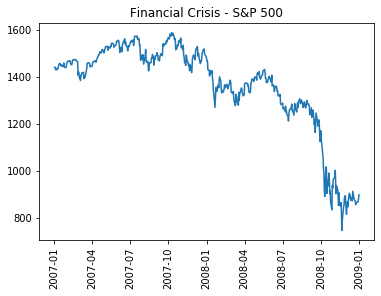

In [17]:
plt.plot(SPFC_df['Date'],SPFC_df['Settle'])
plt.title("Financial Crisis - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [18]:
SP500_Flash_df = SP500_df.loc[(SP500_df["Date"] >= "2010-02-01") & 
                                   (SP500_df["Date"] <= "2010-06-30")]

SP500_Flash_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
3159,2010-02-01,1.45,1067.75,1081.50,1063.25,1081.00,NaN,1081.00,714.0,14104.0
3160,2010-02-02,1.06,1081.25,1096.50,1078.25,1092.50,NaN,1092.50,2778.0,15752.0
3161,2010-02-03,-0.23,1092.75,1095.00,1085.75,1090.00,NaN,1090.00,1019.0,15739.0
3162,2010-02-04,-3.03,1090.75,1091.50,1054.75,1057.00,NaN,1057.00,1899.0,15969.0
3163,2010-02-05,-0.19,1056.75,1060.25,1036.25,1055.00,NaN,1055.00,3104.0,17456.0
...,...,...,...,...,...,...,...,...,...,...
3262,2010-06-24,-1.55,1082.25,1086.50,1063.00,1066.25,NaN,1066.25,1462.0,5962.0
3263,2010-06-25,0.40,1066.50,1075.00,1059.75,1070.50,NaN,1070.50,1490.0,6322.0
3264,2010-06-28,-0.37,1071.75,1074.00,1062.75,1066.50,NaN,1066.50,657.0,6321.0
3265,2010-06-29,-3.33,1065.25,1068.75,1026.50,1031.00,NaN,1031.00,5277.0,9995.0


In [19]:
SP500_debtc_df = SP500_df.loc[(SP500_df["Date"] >= "2011-09-01") & 
                                   (SP500_df["Date"] <= "2012-06-30")]

SP500_debtc_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
3570,2011-09-01,-1.46,1212.00,1222.00,1195.25,1195.50,NaN,1195.50,28654.0,116603.0
3571,2011-09-02,-2.68,1195.00,1198.25,1163.00,1163.50,NaN,1163.50,33677.0,132833.0
3572,2011-09-05,-2.02,1161.00,1161.00,1132.75,1140.00,NaN,1140.00,33677.0,132810.0
3573,2011-09-06,1.64,1138.50,1160.00,1130.50,1158.75,NaN,1158.75,62357.0,167635.0
3574,2011-09-07,2.98,1158.50,1194.00,1158.50,1193.25,NaN,1193.25,246217.0,351035.0
...,...,...,...,...,...,...,...,...,...,...
3780,2012-06-25,-1.52,1318.75,1318.75,1296.00,1299.00,NaN,1299.00,671.0,12816.0
3781,2012-06-26,0.62,1300.50,1311.00,1297.00,1307.00,NaN,1307.00,1712.0,14071.0
3782,2012-06-27,0.90,1308.00,1321.50,1306.25,1318.75,NaN,1318.75,976.0,14565.0
3783,2012-06-28,-0.25,1318.50,1321.00,1300.50,1315.50,NaN,1315.50,1762.0,15012.0


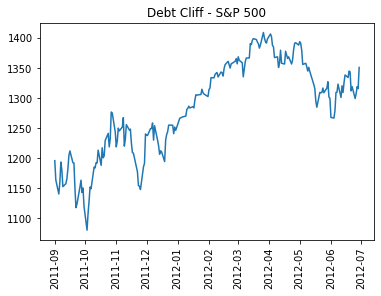

In [20]:
plt.plot(SP500_debtc_df['Date'],SP500_debtc_df['Settle'])
plt.title("Debt Cliff - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [21]:
SP500_Chinablack_df = SP500_df.loc[(SP500_df["Date"] >= "2015-01-02") & 
                                   (SP500_df["Date"] <= "2016-03-01")]

SP500_Chinablack_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
4421,2015-01-02,-0.31,2047.75,2060.00,2031.75,2039.50,6.25,2039.00,2059.0,8541.0
4422,2015-01-05,-1.50,2037.00,2041.25,2002.50,2010.50,30.50,2008.50,2388.0,8589.0
4423,2015-01-06,-1.07,2011.50,2016.00,1977.50,1988.25,21.50,1987.00,2691.0,9120.0
4424,2015-01-07,1.28,1989.50,2016.50,1989.50,2013.25,25.50,2012.50,1465.0,9661.0
4425,2015-01-08,1.75,2014.50,2051.25,2013.50,2047.00,35.25,2047.75,2663.0,9774.0
...,...,...,...,...,...,...,...,...,...,...
4708,2016-02-24,0.72,1904.50,1924.25,1877.25,1924.25,13.75,1921.00,10140.0,98523.0
4709,2016-02-25,1.05,1923.75,1941.75,1911.25,1940.75,20.25,1941.25,15564.0,102105.0
4710,2016-02-26,-0.40,1939.25,1959.25,1932.50,1932.50,7.75,1933.50,11341.0,111313.0
4711,2016-02-29,-0.69,1933.50,1947.00,1917.75,1919.25,13.25,1920.25,15110.0,114669.0


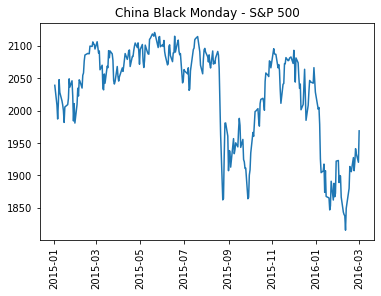

In [22]:
plt.plot(SP500_Chinablack_df['Date'],SP500_Chinablack_df['Settle'])
plt.title("China Black Monday - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [23]:
SP500_2018_df = SP500_df.loc[(SP500_df["Date"] >= "2017-01-02") & 
                                   (SP500_df["Date"] <= "2018-07-31")]

SP500_2018_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
4925,2017-01-03,0.74,2235.75,2253.75,2234.00,2246.75,16.50,2247.00,2292.0,10946.0
4926,2017-01-04,0.51,2246.25,2261.00,2245.75,2258.50,11.50,2258.50,3076.0,12196.0
4927,2017-01-05,0.00,2259.00,2260.00,2248.50,2258.75,NaN,2258.50,6209.0,14014.0
4928,2017-01-06,0.32,2258.25,2270.75,2252.75,2265.00,7.25,2265.75,1918.0,17296.0
4929,2017-01-09,-0.29,2265.75,2269.25,2258.00,2258.50,6.50,2259.25,1074.0,17334.0
...,...,...,...,...,...,...,...,...,...,...
5317,2018-07-25,0.73,2821.50,2853.50,2818.25,2849.00,20.50,2845.50,4824.0,53465.0
5318,2018-07-26,0.04,2843.00,2850.25,2837.50,2843.50,1.00,2846.50,2903.0,54240.0
5319,2018-07-27,-0.88,2844.75,2851.25,2813.00,2821.75,25.00,2821.50,2050.0,56329.0
5320,2018-07-30,-0.51,2820.25,2825.25,2802.50,2809.25,14.25,2807.25,1725.0,56842.0


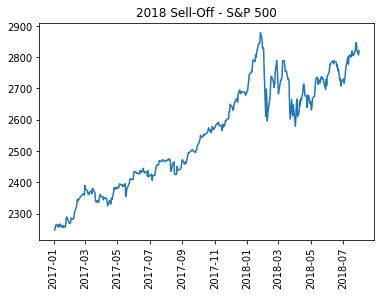

In [24]:
plt.plot(SP500_2018_df['Date'],SP500_2018_df['Settle'])
plt.title("2018 Sell-Off - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [25]:
SP500_Covid_df = SP500_df.loc[(SP500_df["Date"] >= "2017-01-02") & 
                                   (SP500_df["Date"] <= "2020-06-05")]

SP500_Covid_df

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
4925,2017-01-03,0.74,2235.75,2253.75,2234.00,2246.75,16.50,2247.00,2292.0,10946.0
4926,2017-01-04,0.51,2246.25,2261.00,2245.75,2258.50,11.50,2258.50,3076.0,12196.0
4927,2017-01-05,0.00,2259.00,2260.00,2248.50,2258.75,NaN,2258.50,6209.0,14014.0
4928,2017-01-06,0.32,2258.25,2270.75,2252.75,2265.00,7.25,2265.75,1918.0,17296.0
4929,2017-01-09,-0.29,2265.75,2269.25,2258.00,2258.50,6.50,2259.25,1074.0,17334.0
...,...,...,...,...,...,...,...,...,...,...
5783,2020-06-01,0.39,3020.00,3048.25,2998.50,3043.25,11.75,3043.50,10676.0,43905.0
5784,2020-06-02,0.72,3043.50,3067.25,3024.50,3066.25,22.00,3065.50,20121.0,50022.0
5785,2020-06-03,1.34,3067.00,3118.00,3063.00,3106.25,41.00,3106.50,23328.0,54240.0
5786,2020-06-04,-0.22,3106.75,3115.75,3077.00,3103.00,6.75,3099.75,31864.0,57382.0


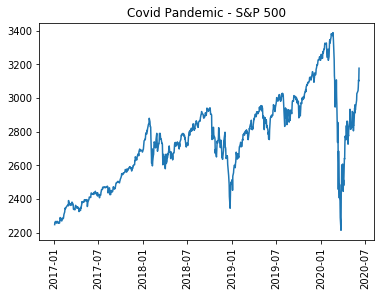

In [26]:
plt.plot(SP500_Covid_df['Date'],SP500_Covid_df['Settle'])
plt.title("Covid Pandemic - S&P 500")
plt.xticks(rotation = 90)
plt.show()

In [27]:
copper = 'copper_2nd.csv'
copper_df = pd.read_csv(copper)
print(copper_df.shape)


(9984, 9)


In [28]:
gold = 'gold_2nd.csv'
gold_df = pd.read_csv(gold)
print(copper_df.shape)


(9984, 9)


In [29]:
copp_gold_df = pd.merge(gold_df, copper_df, on=["Date"])
copp_gold_df.head()


,Date,Open_x,High_x,Low_x,Last_x,Change_x,Settle_x,Volume_x,Previous Day Open Interest_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y
0,1975-09-26,136.1,139.3,136.1,139.0,NaN,139.0,972.0,4713.0,0.573,0.581,0.573,0.580,NaN,0.580,51.0,2174.0
1,1975-09-29,138.2,141.3,138.2,139.8,NaN,139.8,1012.0,4626.0,0.578,0.578,0.575,0.575,NaN,0.575,78.0,2179.0
2,1975-09-30,141.5,143.9,141.5,142.2,NaN,142.2,947.0,4556.0,0.572,0.579,0.571,0.571,NaN,0.571,35.0,2169.0
3,1975-10-01,145.0,145.8,143.6,144.2,NaN,144.2,1153.0,4510.0,0.575,0.575,0.571,0.572,NaN,0.572,99.0,2151.0
4,1975-10-02,145.0,146.2,142.5,143.4,NaN,143.4,1159.0,4254.0,0.570,0.570,0.567,0.568,NaN,0.568,20.0,2144.0


In [30]:
copp_gold_df = pd.DataFrame({
    "Date": copp_gold_df["Date"],
    "Gold Price": copp_gold_df["Settle_x"],
    "Copper Price": copp_gold_df["Settle_y"]
})
copp_gold_df

,Date,Gold Price,Copper Price
0,1975-09-26,139.0,0.5800
1,1975-09-29,139.8,0.5750
2,1975-09-30,142.2,0.5710
3,1975-10-01,144.2,0.5720
4,1975-10-02,143.4,0.5680
...,...,...,...
8677,2020-06-03,1704.8,2.4875
8678,2020-06-04,1727.4,2.4895
8679,2020-06-05,1683.0,2.5555
8680,2020-06-08,1705.1,2.5655


In [31]:
copp_gold_df_corr = st.pearsonr(copp_gold_df["Gold Price"],copp_gold_df["Copper Price"])[0]
print(copp_gold_df_corr)

0.8654867766194552


In [32]:
gold_copp_ratio = (copp_gold_df["Copper Price"] / copp_gold_df["Gold Price"])

In [33]:
copp_gold_df.insert(3,"GoldCopperRatio", gold_copp_ratio)
copp_gold_df.tail()                                       


,Date,Gold Price,Copper Price,GoldCopperRatio
8677,2020-06-03,1704.8,2.4875,0.001459
8678,2020-06-04,1727.4,2.4895,0.001441
8679,2020-06-05,1683.0,2.5555,0.001518
8680,2020-06-08,1705.1,2.5655,0.001505
8681,2020-06-09,1721.9,2.5990,0.001509


In [34]:
copp_gold_df = copp_gold_df.sort_index(axis=0, ascending=True)
copp_gold_df.head()


,Date,Gold Price,Copper Price,GoldCopperRatio
0,1975-09-26,139.0,0.580,0.004173
1,1975-09-29,139.8,0.575,0.004113
2,1975-09-30,142.2,0.571,0.004015
3,1975-10-01,144.2,0.572,0.003967
4,1975-10-02,143.4,0.568,0.003961


In [35]:
copp_gold_percent_chg = []
previous_price = .002849
for index , row in copp_gold_df.iterrows():
    GcR_row = row["GoldCopperRatio"]
    GcR_daily_pctchg = (GcR_row - previous_price) / previous_price *100
    copp_gold_percent_chg.append(round(GcR_daily_pctchg, 2))
    previous_price = GcR_row
copp_gold_df.insert(1,"Gold-Copp Dly Ret", copp_gold_percent_chg)
copp_gold_df.tail()



,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8677,2020-06-03,1.57,1704.8,2.4875,0.001459
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441
8679,2020-06-05,5.36,1683.0,2.5555,0.001518
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505
8681,2020-06-09,0.32,1721.9,2.5990,0.001509


In [36]:
copp_gold_df.tail(25)

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8657,2020-05-05,0.94,1710.6,2.3330,0.001364
8658,2020-05-06,1.94,1688.5,2.3475,0.001390
8659,2020-05-07,-0.81,1725.8,2.3800,0.001379
8660,2020-05-08,1.75,1713.9,2.4050,0.001403
8661,2020-05-11,-0.13,1698.0,2.3795,0.001401
8662,2020-05-12,-1.44,1706.8,2.3575,0.001381
8663,2020-05-13,-1.04,1716.4,2.3460,0.001367
8664,2020-05-14,-1.41,1740.9,2.3460,0.001348
8665,2020-05-15,-1.57,1756.3,2.3295,0.001326
8666,2020-05-18,4.41,1734.4,2.4020,0.001385


In [37]:
copp_gold_df["Date"] = pd.to_datetime(copp_gold_df["Date"])

In [38]:
copp_gold_years_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1980-12-31") & 
                                   (copp_gold_df["Date"] <= "2020-01-02")]

copp_gold_years_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
372,1981-09-28,25.23,441.8,0.7770,0.001759
373,1981-09-29,0.00,441.5,0.7765,0.001759
374,1981-09-30,-0.15,443.0,0.7780,0.001756
375,1981-10-01,1.72,440.0,0.7860,0.001786
376,1981-10-02,-1.74,447.5,0.7855,0.001755
...,...,...,...,...,...
8568,2019-12-24,-0.45,1504.8,2.8250,0.001877
8569,2019-12-26,0.12,1514.4,2.8465,0.001880
8570,2019-12-27,-0.98,1518.1,2.8255,0.001861
8571,2019-12-31,-1.59,1526.5,2.7960,0.001832


In [39]:
copp_gold_87_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1987-01-01") & 
                                   (copp_gold_df["Date"] <= "1987-10-31")]

copp_gold_87_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
751,1987-09-29,11.59,464.4,0.7980,0.001718
752,1987-09-30,0.65,458.8,0.7935,0.001730
753,1987-10-01,-0.45,459.7,0.7915,0.001722
754,1987-10-02,2.20,460.3,0.8100,0.001760
755,1987-10-05,1.55,462.8,0.8270,0.001787
756,1987-10-06,-0.34,462.7,0.8240,0.001781
757,1987-10-07,0.27,463.4,0.8275,0.001786
758,1987-10-08,-0.12,466.5,0.8320,0.001783
759,1987-10-09,1.12,466.9,0.8420,0.001803
760,1987-10-12,0.99,466.7,0.8500,0.001821


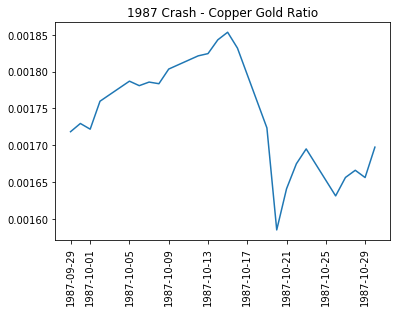

In [40]:
plt.plot(copp_gold_87_df['Date'],copp_gold_87_df['GoldCopperRatio'])
plt.title("1987 Crash - Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [41]:
copp_gold_ltcm_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1997-10-01") & 
                                   (copp_gold_df["Date"] <= "1998-10-31")]

copp_gold_ltcm_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
3036,1997-10-01,-0.23,336.1,0.9600,0.002856
3037,1997-10-02,-2.11,333.5,0.9325,0.002796
3038,1997-10-03,-0.96,336.9,0.9330,0.002769
3039,1997-10-06,1.28,334.6,0.9385,0.002805
3040,1997-10-07,0.98,333.3,0.9440,0.002832
...,...,...,...,...,...
3304,1998-10-26,-0.83,293.6,0.7165,0.002440
3305,1998-10-27,-1.24,294.8,0.7105,0.002410
3306,1998-10-28,-0.64,294.4,0.7050,0.002395
3307,1998-10-29,0.53,296.8,0.7145,0.002407


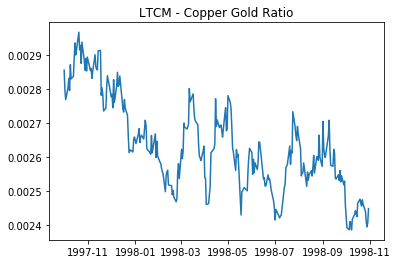

In [42]:
plt.plot(copp_gold_ltcm_df['Date'],copp_gold_ltcm_df['GoldCopperRatio'])
plt.title("LTCM - Copper Gold Ratio")
plt.show()

In [43]:
copp_gold_tech_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1999-01-02") & 
                                   (copp_gold_df["Date"] <= "2000-09-30")]

copp_gold_tech_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
3350,1999-01-04,-2.47,290.3,0.6490,0.002236
3351,1999-01-05,-0.83,289.8,0.6425,0.002217
3352,1999-01-06,0.73,290.6,0.6490,0.002233
3353,1999-01-07,-1.40,294.5,0.6485,0.002202
3354,1999-01-08,1.14,294.1,0.6550,0.002227
...,...,...,...,...,...
3782,2000-09-25,-0.04,277.3,0.9280,0.003347
3783,2000-09-26,-1.13,277.3,0.9175,0.003309
3784,2000-09-27,-1.90,281.6,0.9140,0.003246
3785,2000-09-28,1.13,278.9,0.9155,0.003283


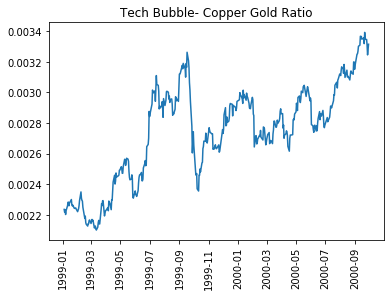

In [44]:
plt.plot(copp_gold_tech_df['Date'],copp_gold_tech_df['GoldCopperRatio'])
plt.title("Tech Bubble- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [45]:
copp_gold_911_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2000-01-02") & 
                                   (copp_gold_df["Date"] <= "2001-10-31")]

copp_gold_911_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
3600,2000-01-04,0.37,285.7,0.8435,0.002952
3601,2000-01-05,1.58,284.1,0.8520,0.002999
3602,2000-01-06,-0.57,284.4,0.8480,0.002982
3603,2000-01-07,0.00,284.9,0.8495,0.002982
3604,2000-01-10,-0.81,284.7,0.8420,0.002957
...,...,...,...,...,...
4053,2001-10-25,-0.12,278.2,0.6230,0.002239
4054,2001-10-26,1.41,278.3,0.6320,0.002271
4055,2001-10-29,-1.05,279.7,0.6285,0.002247
4056,2001-10-30,0.71,281.7,0.6375,0.002263


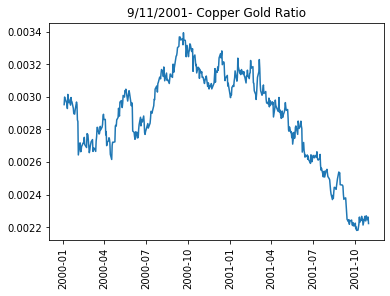

In [46]:
plt.plot(copp_gold_911_df['Date'],copp_gold_911_df['GoldCopperRatio'])
plt.title("9/11/2001- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [47]:
copp_gold_FC_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2007-01-02") & 
                                   (copp_gold_df["Date"] <= "2008-12-31")]

copp_gold_FC_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
5345,2007-01-03,-6.52,636.0,2.6445,0.004158
5346,2007-01-04,-1.15,632.3,2.5990,0.004110
5347,2007-01-05,0.53,612.9,2.5325,0.004132
5348,2007-01-08,-0.72,615.4,2.5245,0.004102
5349,2007-01-09,0.18,621.0,2.5520,0.004110
...,...,...,...,...,...
5841,2008-12-24,-1.75,848.0,1.2595,0.001485
5842,2008-12-26,-0.50,871.2,1.2875,0.001478
5843,2008-12-29,0.42,875.3,1.2990,0.001484
5844,2008-12-30,1.67,870.9,1.3140,0.001509


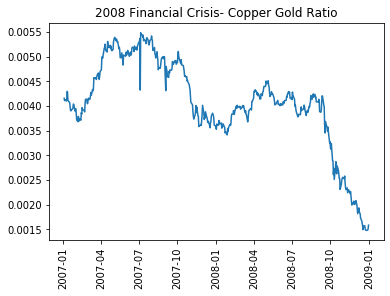

In [48]:
plt.plot(copp_gold_FC_df['Date'],copp_gold_FC_df['GoldCopperRatio'])
plt.title("2008 Financial Crisis- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [49]:
copp_gold_flash_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2010-02-01") & 
                                   (copp_gold_df["Date"] <= "2010-06-30")]

copp_gold_flash_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
6114,2010-02-01,-0.92,1105.0,3.0835,0.002790
6115,2010-02-02,-0.97,1118.0,3.0895,0.002763
6116,2010-02-03,-3.24,1112.0,2.9735,0.002674
6117,2010-02-04,1.29,1063.0,2.8790,0.002708
6118,2010-02-05,0.21,1052.8,2.8575,0.002714
...,...,...,...,...,...
6213,2010-06-24,1.47,1245.9,3.0055,0.002412
6214,2010-06-25,2.15,1256.2,3.0955,0.002464
6215,2010-06-28,0.63,1238.6,3.0715,0.002480
6216,2010-06-29,-5.28,1244.4,2.9230,0.002349


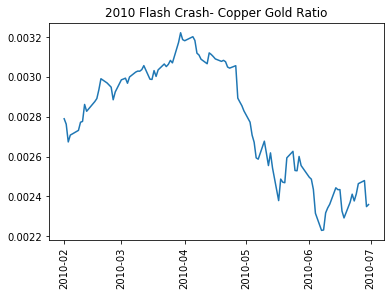

In [50]:
plt.plot(copp_gold_flash_df['Date'],copp_gold_flash_df['GoldCopperRatio'])
plt.title("2010 Flash Crash- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [51]:
copp_gold_debt_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2011-09-01") & 
                                   (copp_gold_df["Date"] <= "2012-06-30")]

copp_gold_debt_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
6503,2011-10-03,-9.35,1657.7,3.1455,0.001898
6504,2011-10-04,1.06,1616.0,3.0990,0.001918
6505,2011-10-05,-1.50,1641.6,3.1010,0.001889
6506,2011-10-06,3.81,1653.2,3.2420,0.001961
6507,2011-10-07,1.89,1635.8,3.2685,0.001998
...,...,...,...,...,...
6683,2012-06-25,-1.06,1588.4,3.3160,0.002088
6684,2012-06-26,0.77,1574.9,3.3130,0.002104
6685,2012-06-27,0.88,1578.4,3.3495,0.002122
6686,2012-06-28,1.08,1552.5,3.3300,0.002145


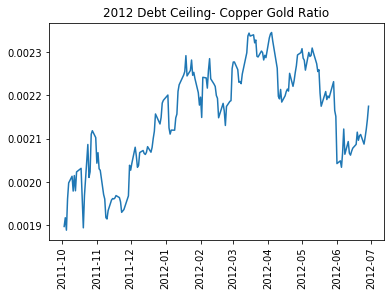

In [52]:
plt.plot(copp_gold_debt_df['Date'],copp_gold_debt_df['GoldCopperRatio'])
plt.title("2012 Debt Ceiling- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [53]:
copp_gold_china_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2015-01-02") & 
                                   (copp_gold_df["Date"] <= "2016-03-01")]

copp_gold_china_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
7316,2015-01-02,-0.39,1186.6,2.8260,0.002382
7317,2015-01-05,-3.05,1204.4,2.7810,0.002309
7318,2015-01-06,-1.06,1219.7,2.7865,0.002285
7319,2015-01-07,0.59,1211.0,2.7830,0.002298
7320,2015-01-08,0.61,1208.8,2.7950,0.002312
...,...,...,...,...,...
7602,2016-02-24,-1.78,1238.7,2.0960,0.001692
7603,2016-02-25,-1.42,1238.8,2.0665,0.001668
7604,2016-02-26,4.21,1220.4,2.1215,0.001738
7605,2016-02-29,-0.74,1234.4,2.1300,0.001726


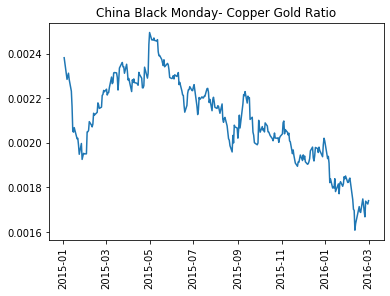

In [54]:
plt.plot(copp_gold_china_df['Date'],copp_gold_china_df['GoldCopperRatio'])
plt.title("China Black Monday- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [55]:
copp_gold_2018_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2017-01-02") & 
                                   (copp_gold_df["Date"] <= "2018-07-31")]

copp_gold_2018_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
7819,2017-01-03,-1.64,1163.2,2.4855,0.002137
7820,2017-01-04,2.41,1166.5,2.5525,0.002188
7821,2017-01-05,-2.10,1182.6,2.5335,0.002142
7822,2017-01-06,1.02,1174.8,2.5425,0.002164
7823,2017-01-09,-1.26,1186.3,2.5350,0.002137
...,...,...,...,...,...
8210,2018-07-25,-0.29,1236.4,2.8090,0.002272
8211,2018-07-26,0.43,1230.5,2.8075,0.002282
8212,2018-07-27,-0.42,1227.8,2.7895,0.002272
8213,2018-07-30,0.20,1226.4,2.7920,0.002277


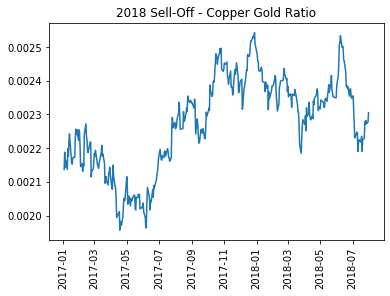

In [56]:
plt.plot(copp_gold_2018_df['Date'],copp_gold_2018_df['GoldCopperRatio'])
plt.title("2018 Sell-Off - Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [57]:
copp_gold_covid_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2019-01-02") & 
                                   (copp_gold_df["Date"] <= "2020-06-05")]

copp_gold_covid_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8321,2019-01-02,-0.41,1287.3,2.6250,0.002039
8322,2019-01-03,-2.97,1298.4,2.5690,0.001979
8323,2019-01-04,3.83,1289.2,2.6485,0.002054
8324,2019-01-07,-0.73,1293.3,2.6375,0.002039
8325,2019-01-08,0.99,1289.3,2.6555,0.002060
...,...,...,...,...,...
8675,2020-06-01,1.94,1750.3,2.4705,0.001411
8676,2020-06-02,1.78,1734.0,2.4910,0.001437
8677,2020-06-03,1.57,1704.8,2.4875,0.001459
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441


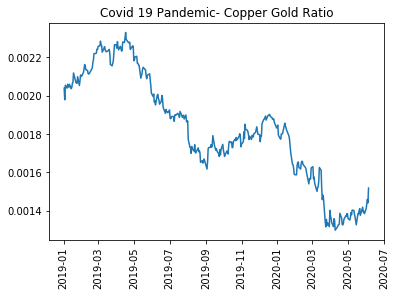

In [58]:
plt.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['GoldCopperRatio'])
plt.title("Covid 19 Pandemic- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [59]:
copp_gold__SP_df = pd.merge(copp_gold_df, SP500_df, on=["Date"])

copp_gold__SP_df.head()


,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1997-09-09,0.05,324.1,0.9655,0.002979,703.75,943.50,951.00,941.50,944.00,NaN,944.00,896.0,273.0
1,1997-09-10,0.31,324.1,0.9685,0.002988,-2.01,942.75,943.25,917.00,925.00,NaN,925.00,12261.0,382.0
2,1997-09-11,-3.58,326.6,0.9410,0.002881,-0.73,924.00,929.75,910.25,918.25,NaN,918.25,9759.0,2909.0
3,1997-09-12,0.44,326.2,0.9440,0.002894,1.69,918.00,936.50,913.50,933.75,NaN,933.75,18496.0,4059.0
4,1997-09-15,0.67,324.7,0.9460,0.002913,-0.24,933.50,939.75,929.00,931.50,NaN,931.50,11749.0,3818.0


In [60]:
copp_gold__SP_df["Date"] = pd.to_datetime(copp_gold__SP_df["Date"])

In [61]:
copp_gold__SP_df.tail()

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5656,2020-06-03,1.57,1704.8,2.4875,0.001459,1.34,3067.00,3118.00,3063.0,3106.25,41.00,3106.50,23328.0,54240.0
5657,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.22,3106.75,3115.75,3077.0,3103.00,6.75,3099.75,31864.0,57382.0
5658,2020-06-05,5.36,1683.0,2.5555,0.001518,2.48,3102.25,3199.75,3096.0,3175.00,76.75,3176.50,56532.0,66325.0
5659,2020-06-08,-0.91,1705.1,2.5655,0.001505,1.27,3181.50,3220.50,3173.0,3215.50,40.25,3216.75,89946.0,75367.0
5660,2020-06-09,0.32,1721.9,2.5990,0.001509,-0.69,3216.00,3220.00,3179.0,3194.50,22.25,3194.50,92923.0,127169.0


In [62]:
copp_gold10_df = copp_gold__SP_df.iloc[1:11, 0:2]

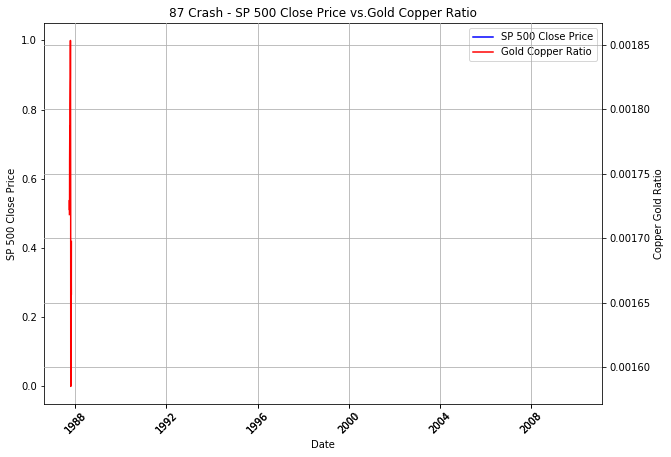

In [63]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP87_df['Date'], SP87_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_87_df['Date'],copp_gold_87_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("87 Crash - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [64]:
CGr_SP_87_df = pd.merge(copp_gold_87_df, SP87_df, on=["Date"])
CGr_SP_87_corr = st.pearsonr(CGr_SP_87_df["GoldCopperRatio"],CGr_SP_87_df["Settle"])[0]
print(CGr_SP_87_corr)

ValueError: x and y must have length at least 2.

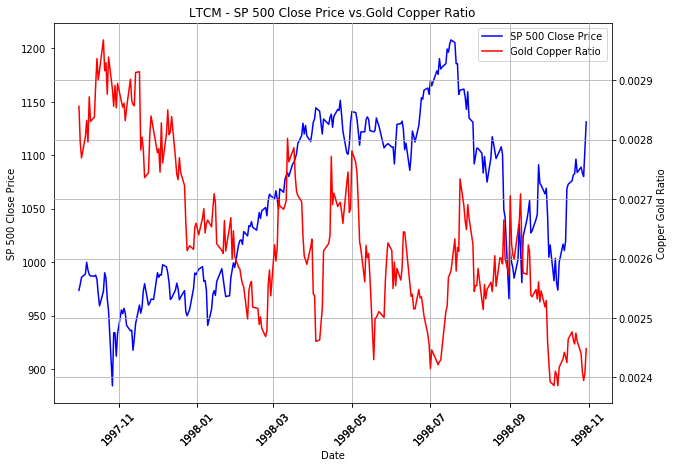

In [65]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPLTCM_df['Date'], SPLTCM_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_ltcm_df['Date'],copp_gold_ltcm_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("LTCM - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

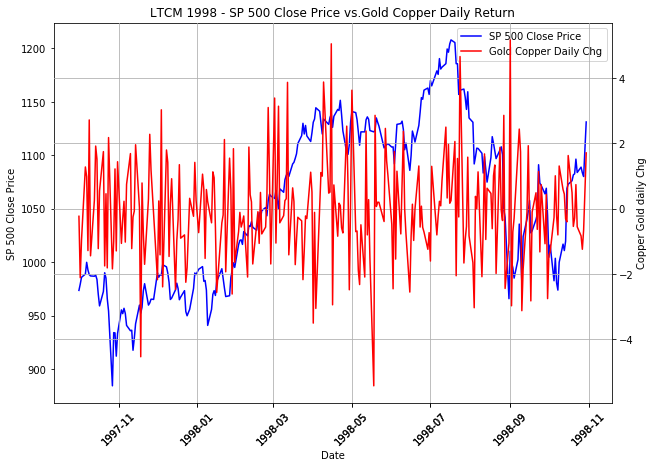

In [66]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPLTCM_df['Date'], SPLTCM_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_ltcm_df['Date'],copp_gold_ltcm_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("LTCM 1998 - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [67]:
CGr_SP_LTCM_df = pd.merge(copp_gold_ltcm_df, SPLTCM_df, on=["Date"])
CGr_SP_LTCM_corr = st.pearsonr(CGr_SP_LTCM_df["GoldCopperRatio"],CGr_SP_LTCM_df["Settle"])[0]
print(CGr_SP_LTCM_corr)

-0.5182976190343421


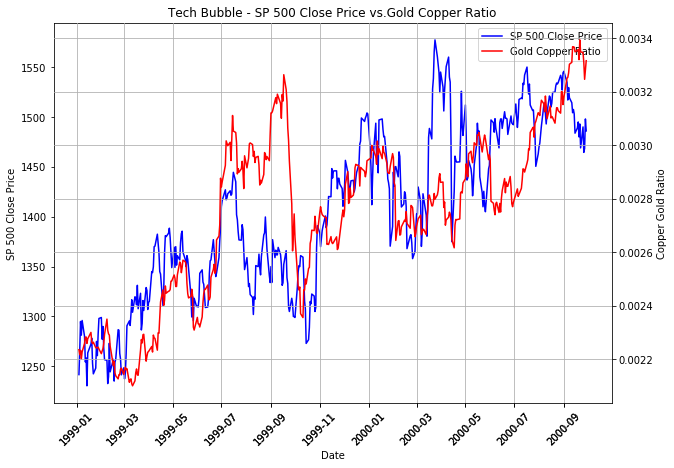

In [68]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPtech_df['Date'], SPtech_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_tech_df['Date'],copp_gold_tech_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("Tech Bubble - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

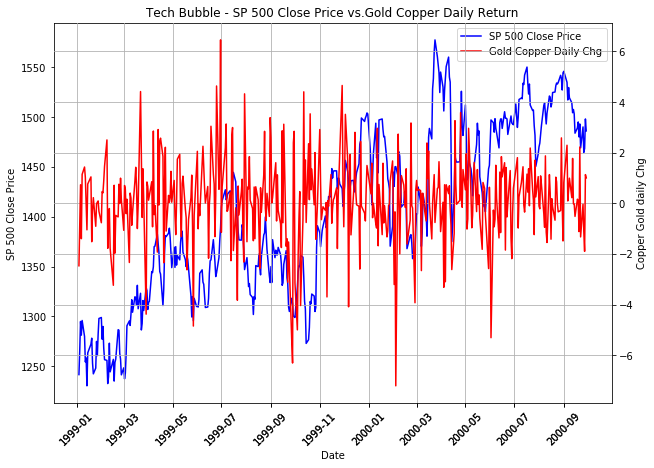

In [69]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPtech_df['Date'], SPtech_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_tech_df['Date'],copp_gold_tech_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("Tech Bubble - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [70]:
CGr_SP_tech_df = pd.merge(copp_gold_tech_df, SPtech_df, on=["Date"])
CGr_SP_tech_corr = st.pearsonr(CGr_SP_tech_df["GoldCopperRatio"],CGr_SP_tech_df["Settle"])[0]
print(CGr_SP_tech_corr)

0.7004921036625438


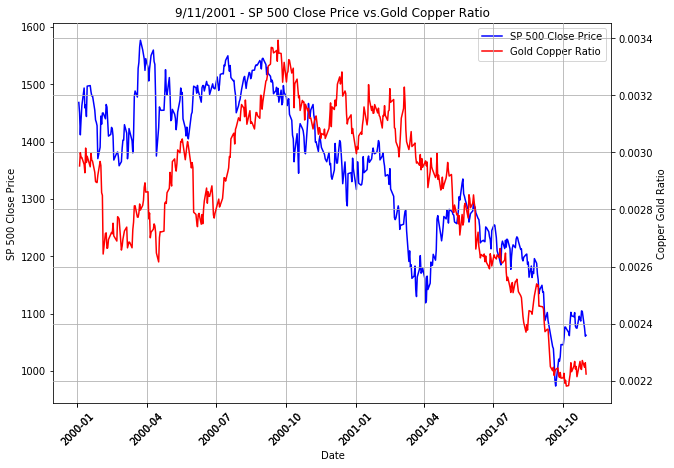

In [71]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP911_df['Date'], SP911_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_911_df['Date'],copp_gold_911_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("9/11/2001 - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

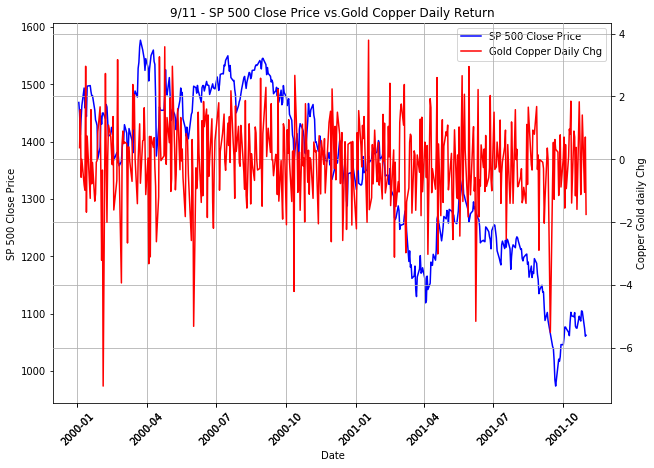

In [72]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP911_df['Date'], SP911_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_911_df['Date'],copp_gold_911_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("9/11 - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [73]:
CGr_SP_911 = pd.merge(copp_gold_911_df, SP911_df )
CGr_SP_911_corr = st.pearsonr(CGr_SP_911_df["GoldCopperRatio"],CGr_SP_911_df["Settle"])[0]
print(CGr_SP_911_corr)

NameError: name 'CGr_SP_911_df' is not defined

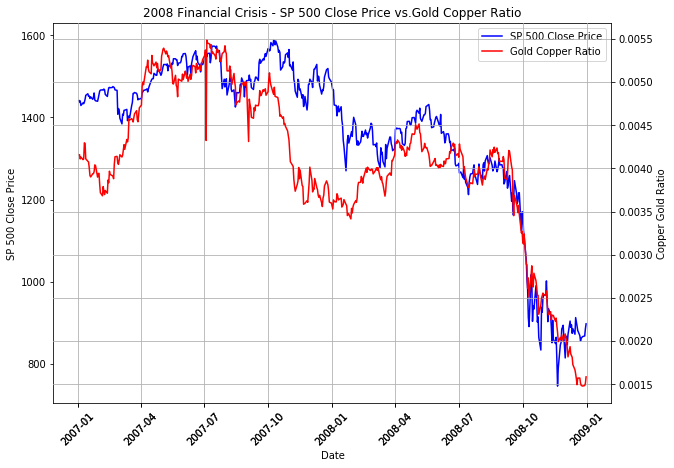

In [74]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPFC_df['Date'], SPFC_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_FC_df['Date'],copp_gold_FC_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("2008 Financial Crisis - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

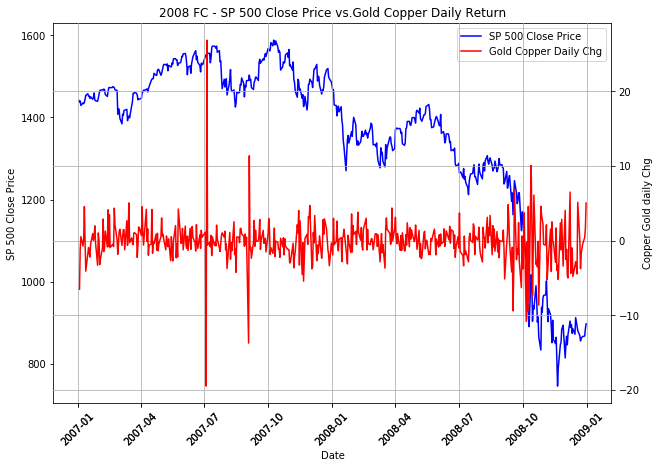

In [75]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SPFC_df['Date'], SPFC_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_FC_df['Date'],copp_gold_FC_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("2008 FC - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [76]:
CGr_SP_FC_df = pd.merge(copp_gold_FC_df, SPFC_df, on=["Date"])
CGr_SP_FC_corr = st.pearsonr(CGr_SP_FC_df["GoldCopperRatio"],CGr_SP_FC_df["Settle"])[0]
print(CGr_SP_FC_corr)

0.8796487015446087


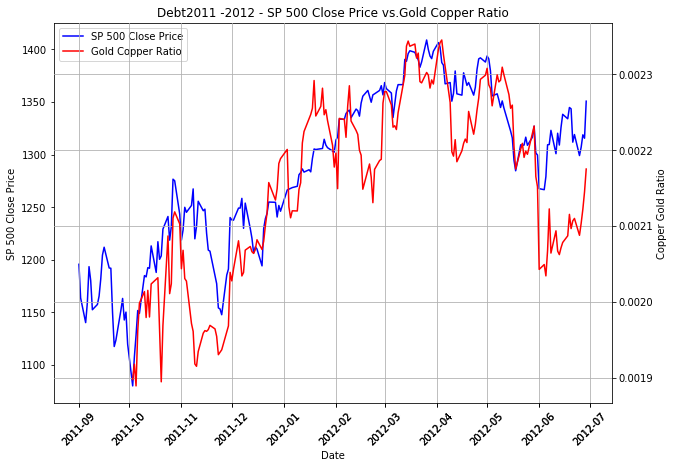

In [77]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_debtc_df['Date'], SP500_debtc_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_debt_df['Date'],copp_gold_debt_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("Debt2011 -2012 - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

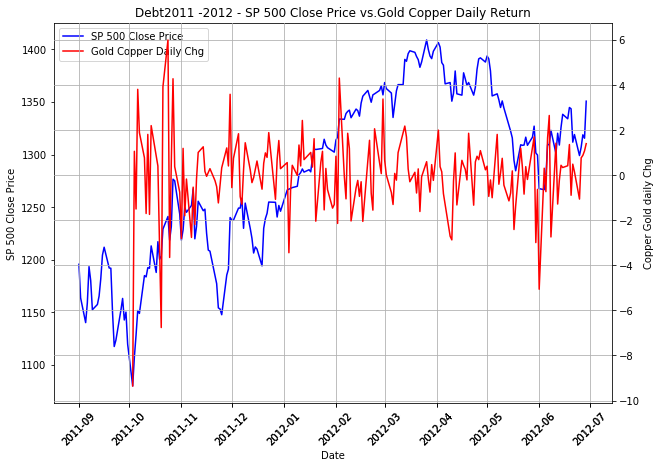

In [78]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_debtc_df['Date'], SP500_debtc_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_debt_df['Date'],copp_gold_debt_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("Debt2011 -2012 - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [79]:
CGr_SP_2011_12_df = pd.merge(copp_gold_debt_df, SP500_debtc_df, on=["Date"])
CGr_SP_2011_12_corr = st.pearsonr(CGr_SP_FC_df["GoldCopperRatio"],CGr_SP_FC_df["Settle"])[0]
print(CGr_SP_2011_12_corr)

0.8796487015446087


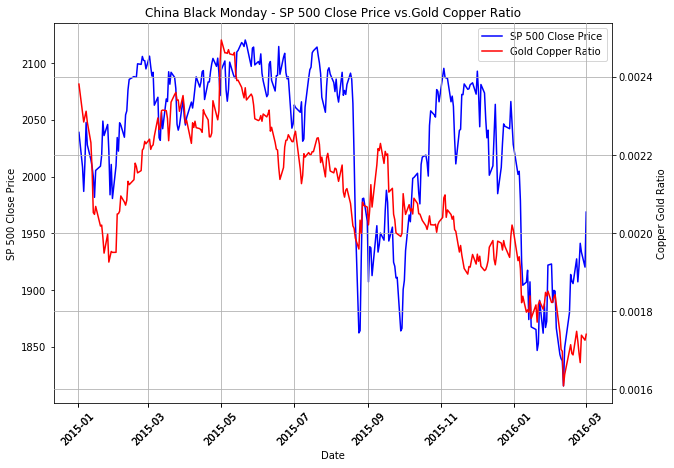

In [80]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_Chinablack_df['Date'], SP500_Chinablack_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_china_df['Date'],copp_gold_china_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("China Black Monday - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

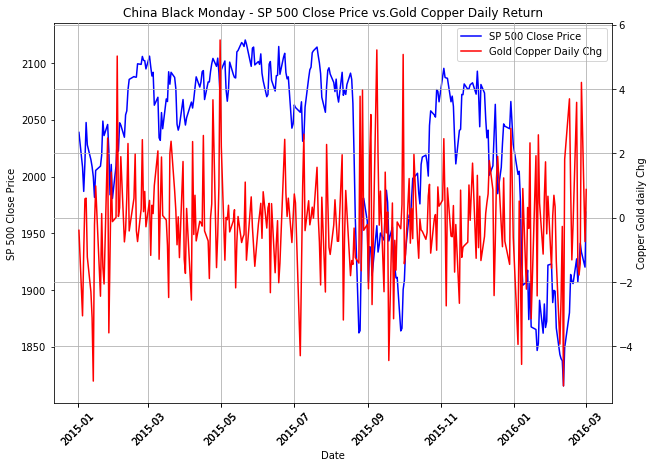

In [81]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_Chinablack_df['Date'], SP500_Chinablack_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_china_df['Date'],copp_gold_china_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("China Black Monday - SP 500 Close Price vs.Gold Copper Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

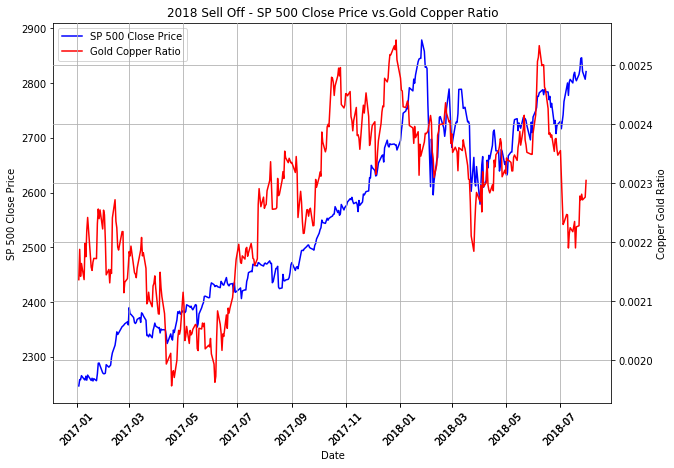

In [82]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_2018_df['Date'], SP500_2018_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_2018_df['Date'],copp_gold_2018_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("2018 Sell Off - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

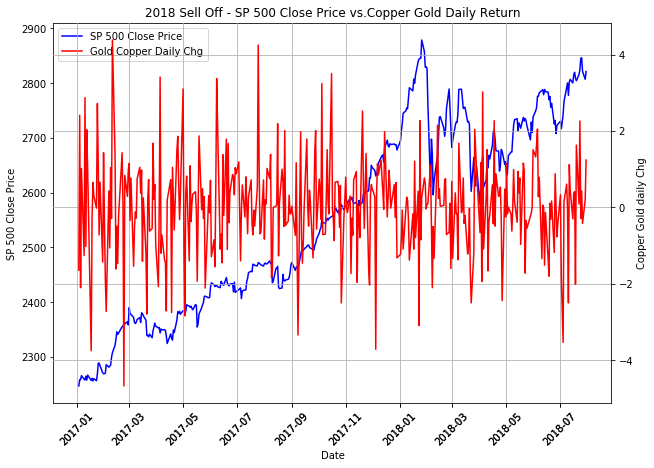

In [83]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_2018_df['Date'], SP500_2018_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_2018_df['Date'],copp_gold_2018_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("2018 Sell Off - SP 500 Close Price vs.Copper Gold Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [84]:
CGr_SP_2018_df = pd.merge(copp_gold_2018_df, SP500_2018_df, on=["Date"])
CGr_SP_2018_corr = st.pearsonr(CGr_SP_2018_df["GoldCopperRatio"],CGr_SP_2018_df["Settle"])[0]
print(CGr_SP_2018_corr)

0.6968316767337306


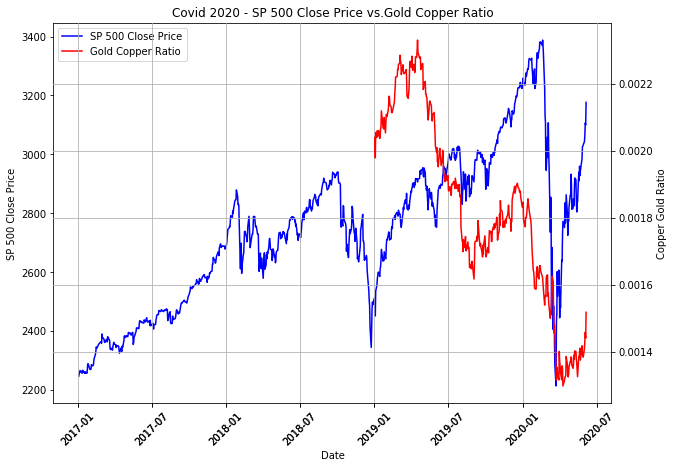

In [85]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_Covid_df['Date'], SP500_Covid_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['GoldCopperRatio'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Ratio"), loc=0)
plt.title("Covid 2020 - SP 500 Close Price vs.Gold Copper Ratio")
plt.xlabel("Date")
plt.grid(alpha=1)
plt.show()

In [86]:
CGr_SP_Covid_df = pd.merge(copp_gold_covid_df, SP500_Covid_df, on=["Date"])
CGr_SP_Covid_corr = st.
pearsonr(CGr_SP_Covid_df["GoldCopperRatio"],CGr_SP_Covid_df["Settle"])[0]
print(CGr_SP_Covid_corr)

SyntaxError: invalid syntax (<ipython-input-86-496e672c5a41>, line 2)

In [87]:
#copp_gold_covid_df.head()
# Rolling Correlation
#Rolling_window = 55
#Rolling_correl =55
#no_of_std = 2

#correl = copp_gold_covid_df['Gold-Copp Dly Ret'].rolling(window=Rolling_window).corr(copp_gold_covid_df['B-5Yr Return'])



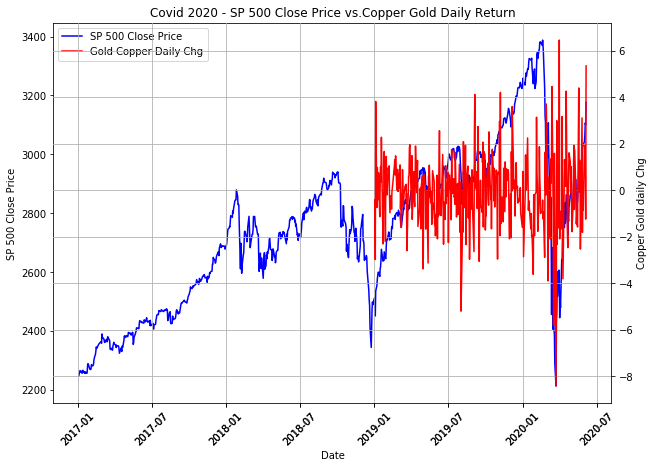

In [88]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_Covid_df['Date'], SP500_Covid_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("Covid 2020 - SP 500 Close Price vs.Copper Gold Daily Return")
plt.xlabel("Date")
plt.grid(alpha=1)
fig1.savefig("2020 Covid SP500 vs Gold Copper daily ret")
plt.show()

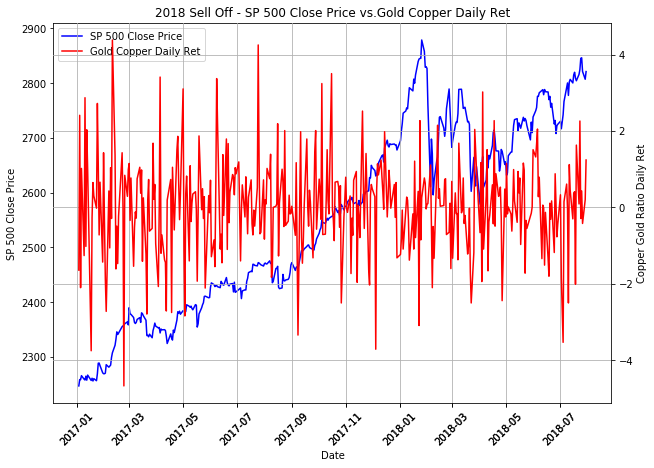

In [89]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_2018_df['Date'], SP500_2018_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_2018_df['Date'],copp_gold_2018_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold Ratio Daily Ret")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Ret"), loc=0)
plt.title("2018 Sell Off - SP 500 Close Price vs.Gold Copper Daily Ret")
plt.xlabel("Date")
plt.grid(alpha=1)
fig1.savefig("2018 Sell Off SP500 vs Gold Copper daily ret")
plt.show()

In [90]:
# fig = plt.figure(figsize=(23,10))

# plt.plot(copp_gold__SP_df['Date'],copp_gold__SP_df['Gold-Copp Dly Ret'])
# plt.plot(copp_gold__SP_df['Date'],copp_gold__SP_df['SP Daily Pct Return'])

# plt.xlim = (-10,10)
# #plt.scatter(copp_gold__SP_df['Date'],copp_gold__SP_df['Copper Price'])

# #plt.title("SP 500 daily returns % vs CopperGold Ratio daily change %")
# plt.xticks(rotation = 90)
# plt.show()

In [91]:
# Plot out rooms versus median house price
# plt.scatter(SP500_2018_df['Date'], SP500_2018_df['Settle'])
# plt.scatter(copp_gold_2018_df['Date'], copp_gold_2018_df['GoldCopperRatio'])
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()

In [92]:
#GCr = copp_gold_2018_df['GoldCopperRatio']
#SP500 = SP500_2018_df['Settle']
#copp_gold_df.corr(method ='pearson')
copp_gold_df.tail()


,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8677,2020-06-03,1.57,1704.8,2.4875,0.001459
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441
8679,2020-06-05,5.36,1683.0,2.5555,0.001518
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505
8681,2020-06-09,0.32,1721.9,2.5990,0.001509


In [93]:
copp_gold_df.corr(method ='pearson')

,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
Gold-Copp Dly Ret,1.000000,-0.012571,0.002473,0.040015
Gold Price,-0.012571,1.000000,0.865487,-0.319685
Copper Price,0.002473,0.865487,1.000000,0.148571
GoldCopperRatio,0.040015,-0.319685,0.148571,1.000000


In [94]:
CGr_SP_Covid_df = pd.merge(copp_gold_covid_df, SP500_Covid_df, on=["Date"])
CGr_SP_Covid_corr = st.pearsonr(CGr_SP_Covid_df["GoldCopperRatio"],CGr_SP_Covid_df["Settle"])[0]
print(CGr_SP_Covid_corr)

-0.07759068424655163


In [95]:
CGr_SP_tech_df = pd.merge(copp_gold_tech_df, SPtech_df, on=["Date"])
CGr_SP_tech_corr = st.pearsonr(CGr_SP_tech_df["GoldCopperRatio"],CGr_SP_tech_df["Settle"])[0]
print(CGr_SP_tech_corr)

0.7004921036625438


In [96]:
CGr_SP_LTCM_df = pd.merge(copp_gold_ltcm_df, SPLTCM_df, on=["Date"])
CGr_SP_LTCM_corr = st.pearsonr(CGr_SP_LTCM_df["GoldCopperRatio"],CGr_SP_LTCM_df["Settle"])[0]
print(CGr_SP_LTCM_corr)

-0.5182976190343421


In [97]:
CGr_SP_2018_df = pd.merge(copp_gold_2018_df, SP500_2018_df, on=["Date"])
CGr_SP_2018_corr = st.pearsonr(CGr_SP_2018_df["GoldCopperRatio"],CGr_SP_2018_df["Settle"])[0]
print(CGr_SP_2018_corr)

0.6968316767337306


In [98]:
CGr_SP_FC_df = pd.merge(copp_gold_FC_df, SPFC_df, on=["Date"])
CGr_SP_FC_corr = st.pearsonr(CGr_SP_FC_df["GoldCopperRatio"],CGr_SP_FC_df["Settle"])[0]
print(CGr_SP_FC_corr)

0.8796487015446087


In [99]:
CGr_SP_2011_12_df = pd.merge(copp_gold_debt_df, SP500_debtc_df, on=["Date"])
CGr_SP_2011_12_corr = st.pearsonr(CGr_SP_2011_12_df["GoldCopperRatio"],CGr_SP_2011_12_df["Settle"])[0]
print(CGr_SP_2011_12_corr)

0.8612211653894124


In [100]:
copp_gold_covid_df.head()

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8321,2019-01-02,-0.41,1287.3,2.6250,0.002039
8322,2019-01-03,-2.97,1298.4,2.5690,0.001979
8323,2019-01-04,3.83,1289.2,2.6485,0.002054
8324,2019-01-07,-0.73,1293.3,2.6375,0.002039
8325,2019-01-08,0.99,1289.3,2.6555,0.002060


In [101]:
copp_gold_df.tail()

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8677,2020-06-03,1.57,1704.8,2.4875,0.001459
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441
8679,2020-06-05,5.36,1683.0,2.5555,0.001518
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505
8681,2020-06-09,0.32,1721.9,2.5990,0.001509


In [102]:
copp_gold_df['MA'] = copp_gold_df.rolling(55).mean()['Gold-Copp Dly Ret']
copp_gold_df.tail(5)

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA
8677,2020-06-03,1.57,1704.8,2.4875,0.001459,-0.149455
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.066545
8679,2020-06-05,5.36,1683.0,2.5555,0.001518,0.102545
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505,0.056909
8681,2020-06-09,0.32,1721.9,2.5990,0.001509,0.080727


In [103]:
copp_gold_df['rolling_std'] = copp_gold_df.rolling(55).std()['Gold-Copp Dly Ret']
copp_gold_df.tail(5)

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA,rolling_std
8677,2020-06-03,1.57,1704.8,2.4875,0.001459,-0.149455,2.463395
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.066545,2.343876
8679,2020-06-05,5.36,1683.0,2.5555,0.001518,0.102545,2.394182
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505,0.056909,2.389027
8681,2020-06-09,0.32,1721.9,2.5990,0.001509,0.080727,2.384922


In [104]:
copp_gold_covid_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2017-01-02") & 
                                   (copp_gold_df["Date"] <= "2020-06-05")]
copp_gold_covid_df.head()

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA,rolling_std
7819,2017-01-03,-1.64,1163.2,2.4855,0.002137,0.448364,1.739765
7820,2017-01-04,2.41,1166.5,2.5525,0.002188,0.498545,1.756039
7821,2017-01-05,-2.10,1182.6,2.5335,0.002142,0.464909,1.788068
7822,2017-01-06,1.02,1174.8,2.5425,0.002164,0.493818,1.783875
7823,2017-01-09,-1.26,1186.3,2.5350,0.002137,0.482727,1.792991


C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


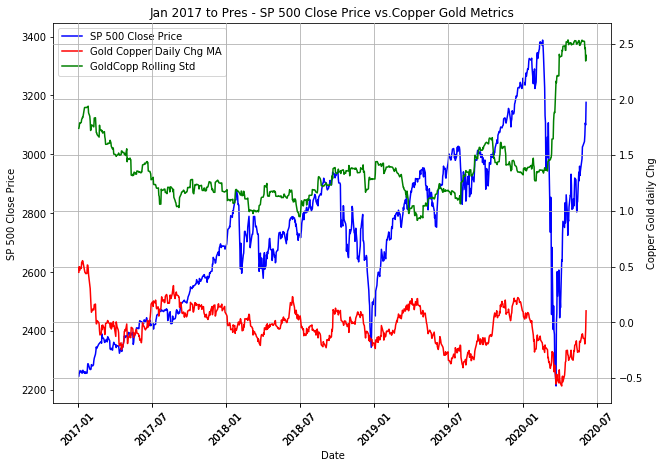

In [105]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_Covid_df['Date'], SP500_Covid_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['MA'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2+line3), ("SP 500 Close Price", "Gold Copper Daily Chg MA", "GoldCopp Rolling Std"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("Jan 2017 to Pres - SP 500 Close Price vs.Copper Gold Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")
plt.show()

In [106]:
copp_gold_covid_df.head()

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA,rolling_std
7819,2017-01-03,-1.64,1163.2,2.4855,0.002137,0.448364,1.739765
7820,2017-01-04,2.41,1166.5,2.5525,0.002188,0.498545,1.756039
7821,2017-01-05,-2.10,1182.6,2.5335,0.002142,0.464909,1.788068
7822,2017-01-06,1.02,1174.8,2.5425,0.002164,0.493818,1.783875
7823,2017-01-09,-1.26,1186.3,2.5350,0.002137,0.482727,1.792991


In [107]:
copp_gold_covid_df.describe()

,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA,rolling_std
count,861.00000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,-0.03151,1351.057840,2.775121,0.002081,-0.033522,1.371083
std,1.42310,140.736747,0.235654,0.000298,0.180690,0.339154
min,-8.41000,1163.200000,2.105500,0.001299,-0.571636,0.914333
25%,-0.79000,1253.700000,2.620500,0.001891,-0.148909,1.167511
50%,-0.01000,1297.500000,2.730500,0.002177,-0.028364,1.306325
75%,0.73000,1433.200000,2.945000,0.002288,0.090727,1.440048
max,6.47000,1759.100000,3.300000,0.002543,0.552909,2.531525


In [108]:
SP500_Covid_df.describe()

,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,863.000000,863.000000,863.000000,863.000000,863.000000,857.00000,863.000000,8.630000e+02,8.630000e+02
mean,0.049328,2736.003766,2754.364716,2717.199015,2737.704229,19.81126,2737.757532,1.879375e+05,2.439379e+05
std,1.286519,256.232725,257.298640,254.847709,256.232429,28.64350,255.982205,5.499667e+05,5.796868e+05
min,-10.390000,2229.500000,2253.750000,2165.500000,2209.500000,0.25000,2213.250000,2.670000e+02,2.438000e+03
25%,-0.265000,2537.750000,2554.875000,2510.750000,2539.750000,4.00000,2541.000000,3.106000e+03,2.922550e+04
50%,0.060000,2748.250000,2767.000000,2726.750000,2750.000000,11.25000,2749.750000,7.033000e+03,6.270600e+04
75%,0.520000,2904.750000,2925.250000,2885.000000,2907.250000,24.00000,2906.500000,2.002200e+04,1.205500e+05
max,9.850000,3391.500000,3397.750000,3373.000000,3389.000000,278.75000,3388.000000,3.731392e+06,3.299307e+06


In [109]:
SP500_df['SP_MA'] = SP500_df.rolling(55).mean()['SP Daily Pct Return']
SP500_df.tail()

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SP_MA
5785,2020-06-03,1.34,3067.00,3118.00,3063.0,3106.25,41.00,3106.50,23328.0,54240.0,0.500545
5786,2020-06-04,-0.22,3106.75,3115.75,3077.0,3103.00,6.75,3099.75,31864.0,57382.0,0.435818
5787,2020-06-05,2.48,3102.25,3199.75,3096.0,3175.00,76.75,3176.50,56532.0,66325.0,0.542364
5788,2020-06-08,1.27,3181.50,3220.50,3173.0,3215.50,40.25,3216.75,89946.0,75367.0,0.574909
5789,2020-06-09,-0.69,3216.00,3220.00,3179.0,3194.50,22.25,3194.50,92923.0,127169.0,0.638909


In [110]:
SP500_Covid_df = SP500_df.loc[(SP500_df["Date"] >= "2017-01-02") & 
                                   (SP500_df["Date"] <= "2020-06-05")]
SP500_Covid_df.head()

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SP_MA
4925,2017-01-03,0.74,2235.75,2253.75,2234.00,2246.75,16.50,2247.00,2292.0,10946.0,0.106727
4926,2017-01-04,0.51,2246.25,2261.00,2245.75,2258.50,11.50,2258.50,3076.0,12196.0,0.115273
4927,2017-01-05,0.00,2259.00,2260.00,2248.50,2258.75,NaN,2258.50,6209.0,14014.0,0.118727
4928,2017-01-06,0.32,2258.25,2270.75,2252.75,2265.00,7.25,2265.75,1918.0,17296.0,0.116727
4929,2017-01-09,-0.29,2265.75,2269.25,2258.00,2258.50,6.50,2259.25,1074.0,17334.0,0.106364


C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


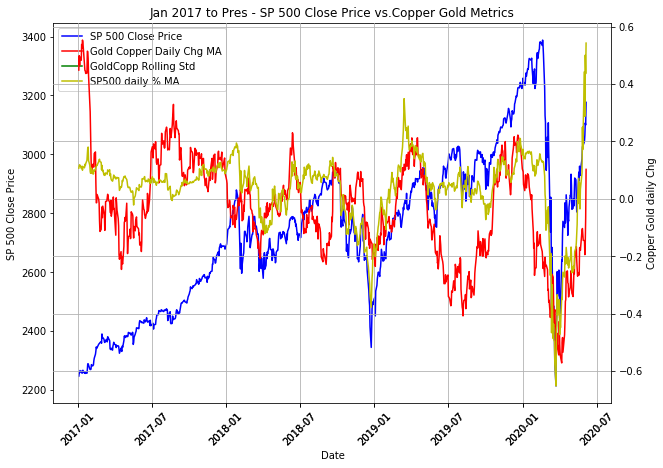

In [111]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP500_Covid_df['Date'], SP500_Covid_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['MA'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line4= ax2.plot(SP500_Covid_df['Date'],SP500_Covid_df['SP_MA'], "y-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2+line3+line4), ("SP 500 Close Price", "Gold Copper Daily Chg MA", "GoldCopp Rolling Std", "SP500 daily % MA"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("Jan 2017 to Pres - SP 500 Close Price vs.Copper Gold Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")
plt.show()

In [112]:
# Rolling Correlation
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = SP500_df['SP Daily Pct Return'].rolling(window=Rolling_window).corr(copp_gold_df['Gold-Copp Dly Ret'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )




0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8677   NaN
8678   NaN
8679   NaN
8680   NaN
8681   NaN
Length: 8682, dtype: float64


In [113]:
SP500_Covid_df['SP Daily Pct Return'].rolling(window=55).corr(other=copp_gold_covid_df['Gold-Copp Dly Ret'])

4925   NaN
4926   NaN
4927   NaN
4928   NaN
4929   NaN
        ..
8675   NaN
8676   NaN
8677   NaN
8678   NaN
8679   NaN
Length: 1724, dtype: float64

In [116]:
SP_GCR_corr_df = pd.merge(SP500_df, copp_gold_df, on=["Date"])
SP_GCR_corr = st.pearsonr(SP_GCR_corr_df["SP Daily Pct Return"],SP_GCR_corr_df["Gold-Copp Dly Ret"])[0]
print(SP_GCR_corr)

0.03498772676864835


In [117]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = SP_GCR_corr_df['SP Daily Pct Return'].rolling(window=Rolling_window).corr(SP_GCR_corr_df['Gold-Copp Dly Ret'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5656    0.146623
5657    0.145037
5658    0.142778
5659    0.140616
5660    0.138094
Length: 5661, dtype: float64


In [118]:
print(upper_correl)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5656    0.235213
5657    0.230498
5658    0.222922
5659    0.214997
5660    0.205148
Length: 5661, dtype: float64


In [119]:
print(lower_correl)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5656    0.058033
5657    0.059577
5658    0.062634
5659    0.066235
5660    0.071039
Length: 5661, dtype: float64


In [123]:
lower_correl.tail(20)

5641   -0.011579
5642   -0.006746
5643   -0.001970
5644   -0.001486
5645   -0.001578
5646   -0.001472
5647    0.000796
5648    0.003508
5649    0.007838
5650    0.013534
5651    0.020725
5652    0.032622
5653    0.043065
5654    0.043071
5655    0.050417
5656    0.058033
5657    0.059577
5658    0.062634
5659    0.066235
5660    0.071039
dtype: float64

In [126]:
SP_GCR_corr_df.head(5)

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SP_MA,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA,rolling_std
0,1997-09-09,703.75,943.50,951.00,941.50,944.00,NaN,944.00,896.0,273.0,NaN,0.05,324.1,0.9655,0.002979,-0.263636,1.941812
1,1997-09-10,-2.01,942.75,943.25,917.00,925.00,NaN,925.00,12261.0,382.0,NaN,0.31,324.1,0.9685,0.002988,-0.250545,1.943234
2,1997-09-11,-0.73,924.00,929.75,910.25,918.25,NaN,918.25,9759.0,2909.0,NaN,-3.58,326.6,0.9410,0.002881,-0.230727,1.902457
3,1997-09-12,1.69,918.00,936.50,913.50,933.75,NaN,933.75,18496.0,4059.0,NaN,0.44,326.2,0.9440,0.002894,-0.177455,1.878899
4,1997-09-15,-0.24,933.50,939.75,929.00,931.50,NaN,931.50,11749.0,3818.0,NaN,0.67,324.7,0.9460,0.002913,-0.206727,1.852256
